# Atlanta Allergy Pollen Count Tracking Over Time
### Script Author: Siran He | 2025-Mar-06 to Present

### Import modules & set up environemnt

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cm as cm
import datetime

In [63]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Load data

In [64]:
df_pollen = pd.read_csv("../data/pollen_count_atl.csv")
df_pollen.head()

,DATE,TREES,YEAR
0,1/1/23,NaN,2023
1,1/2/23,NaN,2023
2,1/3/23,1.0,2023
3,1/4/23,1.0,2023
4,1/5/23,29.0,2023


### Quick checks of the data

In [71]:
df_pollen.info()
df_pollen.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   DATE             1096 non-null   object        
 1   TREES            571 non-null    float64       
 2   YEAR             1096 non-null   int64         
 3   date_dt          1096 non-null   datetime64[ns]
 4   normalized_date  1096 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(1)
memory usage: 42.9+ KB


(1096, 5)

In [ ]:
# Confirm dates are correct format
df_pollen['date_dt'] = pd.to_datetime(df_pollen['DATE'], format='%m/%d/%y', errors='coerce')
print(df_pollen['date_dt'].dtypes)

In [ ]:
# Check date range
df_pollen['date_dt'].min() # 2023-01-01, correct
df_pollen['date_dt'].max() # 2025-12-31, correct (may extend in the future)

### Exploratory plots

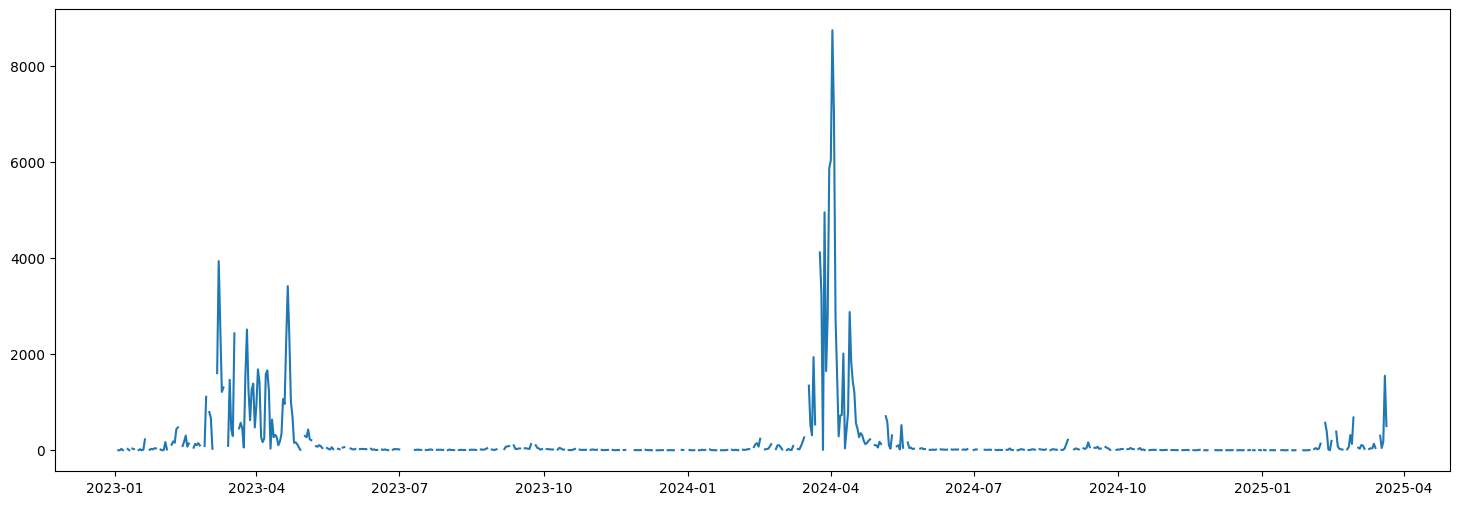

In [86]:
fig, ax = plt.subplots(figsize=(18, 6))
plt.plot(df_pollen['date_dt'], df_pollen['TREES']);  

# This is fully longitudinally data, which is ok as is;
# However, we'd prefer to overlay year by year plot instead

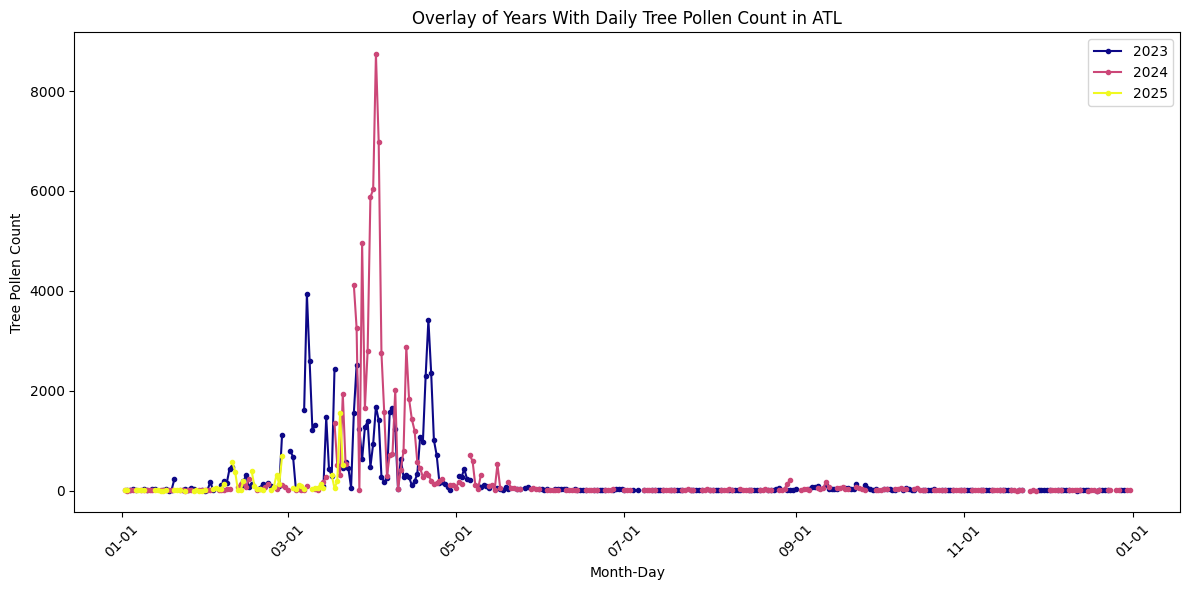

In [115]:
# Normalize dates to the year 2000 (a leap year)
df_pollen['normalized_date'] = df_pollen['date_dt'].apply(lambda dt: dt.replace(year=2000))

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Generate a colormap based on the number of unique years
norm = plt.Normalize(years.min(), years.max())  # Normalize years
colors = plt.colormaps['plasma']  # New method

# Group data by year and plot
for year, group in df_pollen.groupby('YEAR'):
    ax.plot(group['normalized_date'], group['TREES'], marker='.', linestyle='-', 
            color=colors(norm(year)), label=year)

# Format the x-axis to show month and day
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xticks(rotation=45)

# # set date range (other wise shows up as 1/1 to 1/1)
# start_date = datetime.datetime.strptime('01-01', '%m-%d')
# end_date = datetime.datetime.strptime('12-31', '%m-%d')
# plt.xlim(mdates.date2num(start_date), mdates.date2num(end_date))

# Add labels and title
ax.set_xlabel('Month-Day')
ax.set_ylabel('Tree Pollen Count')
ax.set_title('Overlay of Years With Daily Tree Pollen Count in ATL')
ax.legend()

# Display the plot
plt.tight_layout()
plt.show();

In [116]:
fig.savefig('../output/static_tracking_plot.png', bbox_inches='tight')

### Interactive plots